In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image, ImageDraw
from sklearn.mixture import GaussianMixture

In [18]:
data = pd.read_csv('10fold/pneumonia-test-0.csv', sep=';')
data2 = pd.read_csv('10fold/pneumonia-train-0.csv', sep=';')
data.append(data2, ignore_index=True)
print(data['Target'].value_counts())
data = data.loc[data['Target'] != 0]
data.head()
data['center_x'] = data['x'] + data['width'] / 2
data['center_y'] = data['y'] + data['height'] / 2

0    2101
1     900
Name: Target, dtype: int64


In [19]:
data.describe()

,x,y,width,height,Target,center_x,center_y
count,900.000000,900.000000,900.000000,900.000000,900.0,900.000000,900.000000
mean,401.865556,379.456667,213.986667,316.087778,1.0,508.858889,537.500556
std,205.179806,149.569636,57.777024,149.867380,0.0,204.951000,116.629607
min,6.000000,26.000000,59.000000,46.000000,1.0,144.500000,151.000000
25%,216.750000,258.000000,173.750000,201.000000,1.0,312.375000,459.000000
50%,343.500000,386.000000,214.000000,285.000000,1.0,425.250000,535.000000
75%,598.000000,491.000000,253.000000,409.000000,1.0,712.000000,614.750000
max,808.000000,836.000000,413.000000,808.000000,1.0,863.000000,924.500000


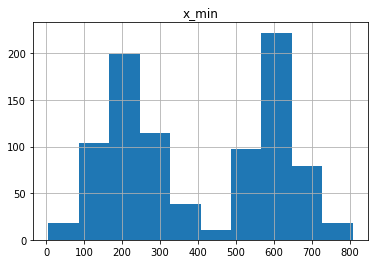

In [17]:
histo = data['x'].hist()
histo.set_title("x_min")
histo

In [6]:
center_x = data['x'] + (data['width']/2)
print(center_x.describe())

histo = (data['x'] + data['width']).hist()
histo.set_title("x_max")
histo.plot()

In [7]:
histo = data['y'].hist()
histo.set_title("y_min")
histo.plot()

In [8]:
center_y = data['y'] + data['height']/2
print(center_y.describe())

histo = (data['y'] + data['height']).hist()
histo.set_title("y_max")
histo.plot()

In [9]:
print(data['width'].describe())
histo = data['width'].hist()
histo.set_title("width")
histo.plot()

In [10]:
print(data['height'].describe())
histo = data['height'].hist()
histo.set_title("height")
histo.plot()

In [ ]:
# full box


In [11]:
def draw_rectangle(image, x_min, y_min, width, height, color='yellow', size=1):
    draw = ImageDraw.Draw(image)
    coordinates = [x_min, y_min, x_min + width + 1, y_min + height + 1]
    draw.rectangle(xy=coordinates, width=size, outline=color)
    return image

def show_grid(images, images_per_line=3):
    #creates a new empty image, RGB mode, and size 400 by 400.
    width, height = images[0].size
    num_lines = int(np.ceil(len(images) / images_per_line))
    grid_width = int(width * images_per_line)
    grid_height = int(height * num_lines)
    background = Image.new('RGB', (grid_width, grid_height))
    
    #Iterate through a 4 by 4 grid with 100 spacing, to place my image
    for i in range(num_lines):
        for j in range(images_per_line):
            idx = i * images_per_line + j
            image = images[idx]
            x = j * width
            y = i * height
            #paste the image at location i,j:
            background.paste(image, (x,y))
    
    return background

In [12]:
num_images = 10
names = []
for i in range(num_images):
    data_filtered = data.drop_duplicates(subset='patientId')
    example = data_filtered.iloc[i]
    patientId = example['patientId']
    name = patientId + '.jpg'
    print(name)
    names.append(name)

images = []
for i in range(num_images):
    name = names[i]
    examples = data.loc[data['patientId'] == name[:-4]]
    
    image = Image.open(os.path.join('images/train', name))
    
    for j in range(len(examples)):
        example = examples.iloc[j]
        image = draw_rectangle(image=image,
                                 x_min=example['x'],
                                 y_min=example['y'],
                                 width=example['width'],
                                 height=example['height'],
                                 color='yellow',
                                 size=4)
    images.append(image)
show_grid(images, images_per_line=2)